# Train AttentionLSTM

In [1]:
%load_ext autoreload
%autoreload 2

# Run if connected to remote Jupyter server
import os
os.chdir('electrochemistry_sean_mcintosh/electrochem')
print(os.getcwd())

import wandb
import time
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from easydict import EasyDict as edict
from random import seed
from random import randint

from utils import train, load_default_config

from keras.models import Model
from keras.layers import Input, Dense
from keras.utils import to_categorical

from waylon_keras_utils import train_model
from waylon_layer_utils import AttentionLSTM


DEFAULT_SEED = 7
DATA_DIR = Path('../data')

sns.set()

/notebooks/electrochemistry_sean_mcintosh/electrochem
Using TensorFlow backend.
wandb: WARNING Keras version 2.3.0 is not fully supported. Required keras >= 2.4.0


In [44]:
from electro_augmenter import ElectroAugmenter

In [47]:
from collections import Counter

In [56]:
aug = ElectroAugmenter(X, Y, batch_size=32, horizontal_shift=0.1, vertical_shift=0.1, noise_shift=0.1)

In [62]:
len(aug.ordering)

320

In [63]:
len(aug)

10

In [58]:
Counter(aug.ordering)

Counter({21: 10,
         2: 10,
         15: 10,
         1: 10,
         24: 10,
         31: 10,
         16: 10,
         4: 10,
         7: 10,
         28: 10,
         0: 10,
         27: 10,
         22: 10,
         26: 10,
         30: 10,
         8: 10,
         6: 10,
         23: 10,
         29: 10,
         12: 10,
         10: 10,
         11: 10,
         17: 10,
         3: 10,
         20: 10,
         5: 10,
         14: 10,
         25: 10,
         9: 10,
         13: 10,
         19: 10,
         18: 10})

In [64]:
# get batches
for i in range(len(aug)):
    X, Y = aug[i]

In [65]:
X.shape

(32, 1, 1000)

In [66]:
Y.shape

(32,)

# Basic Train

RUN NUMBER 1/10
wandb: Currently logged in as: theadammurphy (use `wandb login --relogin` to force relogin)


W0510 12:03:20.664101 140678706673472 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0510 12:03:22.629721 140678706673472 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

Train on 140 samples, validate on 35 samples
Epoch 1/125
 - 1s - loss: 1.3277 - accuracy: 0.4071 - val_loss: 1.2924 - val_accuracy: 0.4571
— f1_micro: 0.4571 — val_f1_micro: 0.4571
Epoch 2/125
 - 0s - loss: 1.2714 - accuracy: 0.4571 - val_loss: 1.2568 - val_accuracy: 0.4571
— f1_micro: 0.4571 — val_f1_micro: 0.4571
Epoch 3/125
 - 0s - loss: 1.2393 - accuracy: 0.4571 - val_loss: 1.22

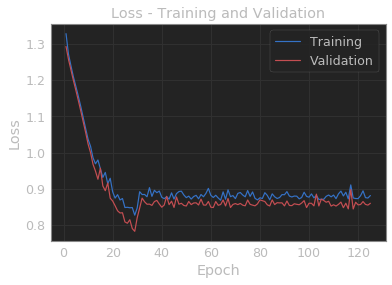

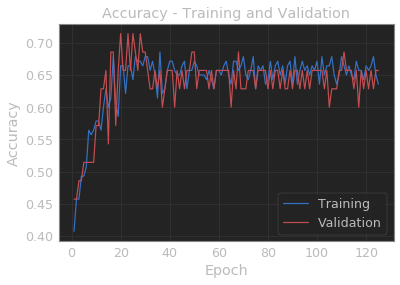

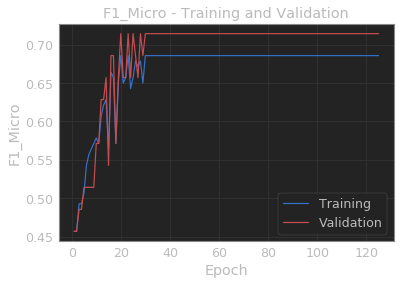

wandb run finished
Run took -35.2 seconds
RUN NUMBER 2/10


Train on 140 samples, validate on 35 samples
Epoch 1/125
 - 1s - loss: 1.3304 - accuracy: 0.3857 - val_loss: 1.2807 - val_accuracy: 0.4571
— f1_micro: 0.4571 — val_f1_micro: 0.4571
Epoch 2/125
 - 0s - loss: 1.2755 - accuracy: 0.4571 - val_loss: 1.2673 - val_accuracy: 0.4571
— f1_micro: 0.4571 — val_f1_micro: 0.4571
Epoch 3/125
 - 0s - loss: 1.2368 - accuracy: 0.4571 - val_loss: 1.2269 - val_accuracy: 0.4571
— f1_micro: 0.4571 — val_f1_micro: 0.4571
Epoch 4/125
 - 0s - loss: 1.2042 - accuracy: 0.4929 - val_loss: 1.1944 - val_accuracy: 0.5143
— f1_micro: 0.5071 — val_f1_micro: 0.5143
Epoch 5/125
 - 0s - loss: 1.1821 - accuracy: 0.4929 - val_loss: 1.1706 - val_accuracy: 0.4857
— f1_micro: 0.5 — val_f1_micro: 0.4857
Epoch 6/125
 - 0s - loss: 1.1498 - accuracy: 0.5357 - val_loss: 1.1361 - val_accuracy: 0.5143
— f1_micro: 0.55 — val_f1_micro: 0.5143
Epoch 7/125
 - 0s - loss: 1.1148 - accuracy: 0.5643 - val_loss: 1.1042 - val_accuracy: 0.5143
— f1_micro: 0.5643 — val_f1_micro: 0.5143
Epoch 8/

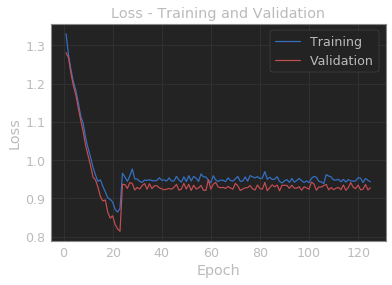

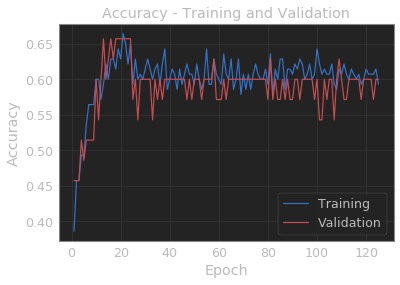

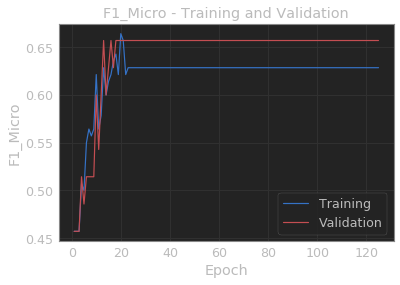

wandb run finished
Run took -35.1 seconds
RUN NUMBER 3/10


Train on 140 samples, validate on 35 samples
Epoch 1/125
 - 2s - loss: 1.3151 - accuracy: 0.3786 - val_loss: 1.2787 - val_accuracy: 0.4571
— f1_micro: 0.4571 — val_f1_micro: 0.4571
Epoch 2/125
 - 0s - loss: 1.2796 - accuracy: 0.4571 - val_loss: 1.2623 - val_accuracy: 0.4571
— f1_micro: 0.4571 — val_f1_micro: 0.4571
Epoch 3/125
 - 0s - loss: 1.2200 - accuracy: 0.4571 - val_loss: 1.2219 - val_accuracy: 0.5143
— f1_micro: 0.5071 — val_f1_micro: 0.5143
Epoch 4/125
 - 0s - loss: 1.2046 - accuracy: 0.5143 - val_loss: 1.1907 - val_accuracy: 0.5143
— f1_micro: 0.5357 — val_f1_micro: 0.5143
Epoch 5/125
 - 0s - loss: 1.1760 - accuracy: 0.5429 - val_loss: 1.1624 - val_accuracy: 0.5143
— f1_micro: 0.5357 — val_f1_micro: 0.5143
Epoch 6/125
 - 0s - loss: 1.1518 - accuracy: 0.5143 - val_loss: 1.1396 - val_accuracy: 0.5143
— f1_micro: 0.5429 — val_f1_micro: 0.5143
Epoch 7/125
 - 0s - loss: 1.1198 - accuracy: 0.5571 - val_loss: 1.1126 - val_accuracy: 0.5143
— f1_micro: 0.5643 — val_f1_micro: 0.5143
Epo

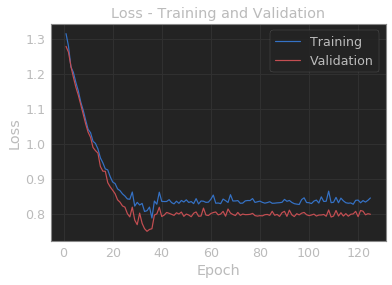

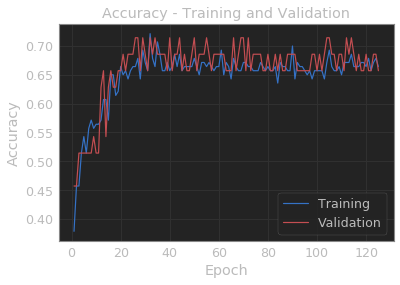

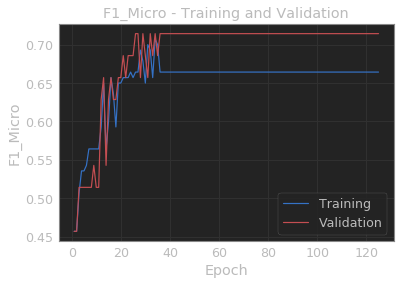

wandb run finished
Run took -35.8 seconds
RUN NUMBER 4/10


Train on 140 samples, validate on 35 samples
Epoch 1/125
 - 2s - loss: 1.3632 - accuracy: 0.3429 - val_loss: 1.2902 - val_accuracy: 0.4571
— f1_micro: 0.4571 — val_f1_micro: 0.4571
Epoch 2/125
 - 0s - loss: 1.2992 - accuracy: 0.4571 - val_loss: 1.2875 - val_accuracy: 0.4571
— f1_micro: 0.4571 — val_f1_micro: 0.4571
Epoch 3/125
 - 0s - loss: 1.2543 - accuracy: 0.4571 - val_loss: 1.2424 - val_accuracy: 0.4571
— f1_micro: 0.4571 — val_f1_micro: 0.4571
Epoch 4/125
 - 0s - loss: 1.2293 - accuracy: 0.4714 - val_loss: 1.2253 - val_accuracy: 0.4857
— f1_micro: 0.4929 — val_f1_micro: 0.4857
Epoch 5/125
 - 0s - loss: 1.2072 - accuracy: 0.4929 - val_loss: 1.2015 - val_accuracy: 0.4857
— f1_micro: 0.4857 — val_f1_micro: 0.4857
Epoch 6/125
 - 0s - loss: 1.1847 - accuracy: 0.4714 - val_loss: 1.1808 - val_accuracy: 0.4857
— f1_micro: 0.4714 — val_f1_micro: 0.4857
Epoch 7/125
 - 0s - loss: 1.1619 - accuracy: 0.5000 - val_loss: 1.1501 - val_accuracy: 0.5143
— f1_micro: 0.5143 — val_f1_micro: 0.5143
Epo

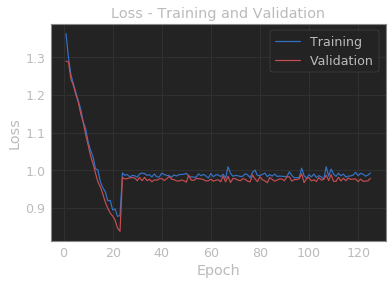

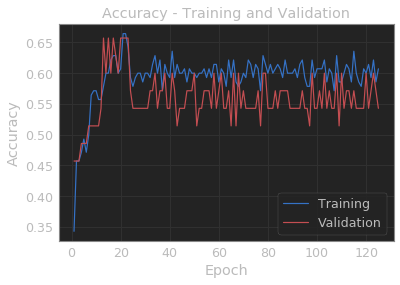

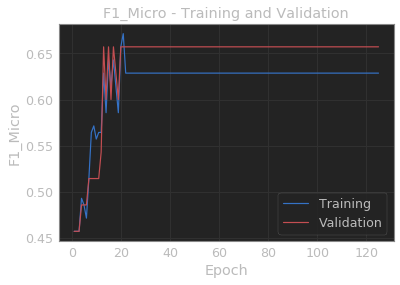

wandb run finished
Run took -44.4 seconds
RUN NUMBER 5/10


Train on 140 samples, validate on 35 samples
Epoch 1/125
 - 2s - loss: 1.3269 - accuracy: 0.3857 - val_loss: 1.2826 - val_accuracy: 0.4571
— f1_micro: 0.4571 — val_f1_micro: 0.4571
Epoch 2/125
 - 0s - loss: 1.2656 - accuracy: 0.4571 - val_loss: 1.2495 - val_accuracy: 0.4571
— f1_micro: 0.4571 — val_f1_micro: 0.4571
Epoch 3/125
 - 0s - loss: 1.2289 - accuracy: 0.4571 - val_loss: 1.2159 - val_accuracy: 0.4857
— f1_micro: 0.4929 — val_f1_micro: 0.4857
Epoch 4/125
 - 0s - loss: 1.1948 - accuracy: 0.5000 - val_loss: 1.1830 - val_accuracy: 0.5143
— f1_micro: 0.5071 — val_f1_micro: 0.5143
Epoch 5/125
 - 0s - loss: 1.1734 - accuracy: 0.5000 - val_loss: 1.1598 - val_accuracy: 0.5143
— f1_micro: 0.5071 — val_f1_micro: 0.5143
Epoch 6/125
 - 0s - loss: 1.1438 - accuracy: 0.5143 - val_loss: 1.1265 - val_accuracy: 0.5143
— f1_micro: 0.5571 — val_f1_micro: 0.5143
Epoch 7/125
 - 0s - loss: 1.1077 - accuracy: 0.5500 - val_loss: 1.0975 - val_accuracy: 0.5143
— f1_micro: 0.5714 — val_f1_micro: 0.5143
Epo

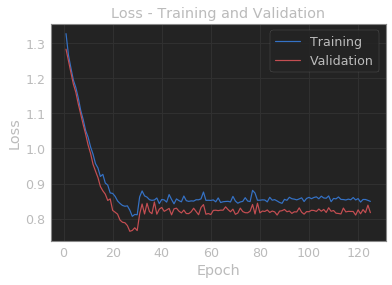

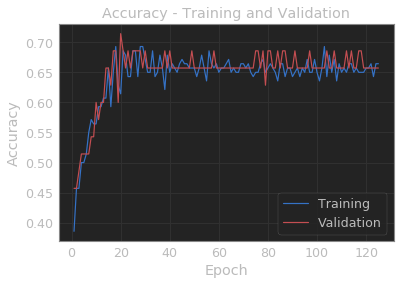

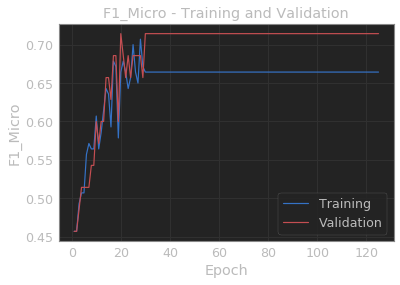

wandb run finished
Run took -38.8 seconds
RUN NUMBER 6/10


Train on 140 samples, validate on 35 samples
Epoch 1/125
 - 2s - loss: 1.2901 - accuracy: 0.4571 - val_loss: 1.2902 - val_accuracy: 0.4571
— f1_micro: 0.4571 — val_f1_micro: 0.4571
Epoch 2/125
 - 0s - loss: 1.2696 - accuracy: 0.4571 - val_loss: 1.2487 - val_accuracy: 0.4571
— f1_micro: 0.4571 — val_f1_micro: 0.4571
Epoch 3/125
 - 0s - loss: 1.2200 - accuracy: 0.4571 - val_loss: 1.2156 - val_accuracy: 0.4857
— f1_micro: 0.4857 — val_f1_micro: 0.4857
Epoch 4/125
 - 0s - loss: 1.1933 - accuracy: 0.5000 - val_loss: 1.1890 - val_accuracy: 0.5143
— f1_micro: 0.5143 — val_f1_micro: 0.5143
Epoch 5/125
 - 0s - loss: 1.1723 - accuracy: 0.5429 - val_loss: 1.1599 - val_accuracy: 0.5143
— f1_micro: 0.5429 — val_f1_micro: 0.5143
Epoch 6/125
 - 0s - loss: 1.1402 - accuracy: 0.5429 - val_loss: 1.1325 - val_accuracy: 0.5143
— f1_micro: 0.5429 — val_f1_micro: 0.5143
Epoch 7/125
 - 0s - loss: 1.1126 - accuracy: 0.5643 - val_loss: 1.1074 - val_accuracy: 0.5143
— f1_micro: 0.5643 — val_f1_micro: 0.5143
Epo

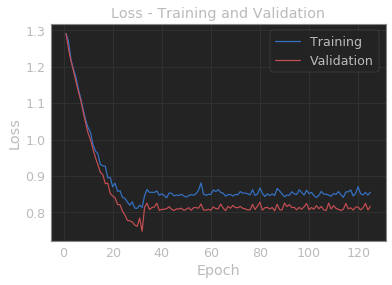

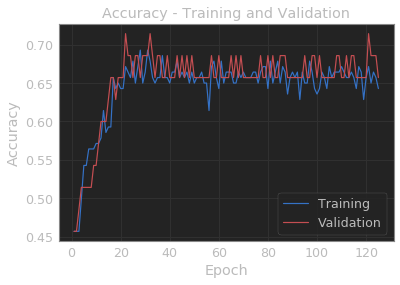

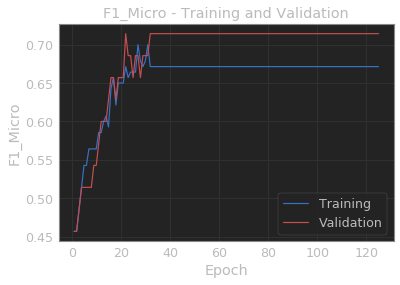

wandb run finished
Run took -40.1 seconds
RUN NUMBER 7/10


Train on 140 samples, validate on 35 samples
Epoch 1/125
 - 2s - loss: 1.3589 - accuracy: 0.3500 - val_loss: 1.2641 - val_accuracy: 0.4571
— f1_micro: 0.4571 — val_f1_micro: 0.4571
Epoch 2/125
 - 0s - loss: 1.2579 - accuracy: 0.4571 - val_loss: 1.2521 - val_accuracy: 0.4571
— f1_micro: 0.4571 — val_f1_micro: 0.4571
Epoch 3/125
 - 0s - loss: 1.2330 - accuracy: 0.4643 - val_loss: 1.2340 - val_accuracy: 0.4857
— f1_micro: 0.4929 — val_f1_micro: 0.4857
Epoch 4/125
 - 0s - loss: 1.2018 - accuracy: 0.5000 - val_loss: 1.1911 - val_accuracy: 0.5143
— f1_micro: 0.5071 — val_f1_micro: 0.5143
Epoch 5/125
 - 0s - loss: 1.1708 - accuracy: 0.5143 - val_loss: 1.1577 - val_accuracy: 0.5143
— f1_micro: 0.5429 — val_f1_micro: 0.5143
Epoch 6/125
 - 0s - loss: 1.1554 - accuracy: 0.5571 - val_loss: 1.1358 - val_accuracy: 0.5143
— f1_micro: 0.5714 — val_f1_micro: 0.5143
Epoch 7/125
 - 0s - loss: 1.1253 - accuracy: 0.5500 - val_loss: 1.1053 - val_accuracy: 0.5143
— f1_micro: 0.5429 — val_f1_micro: 0.5143
Epo

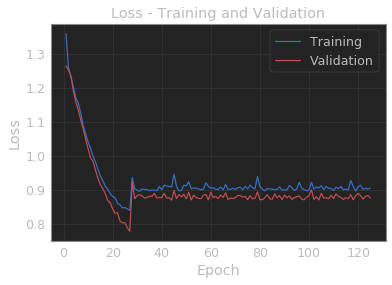

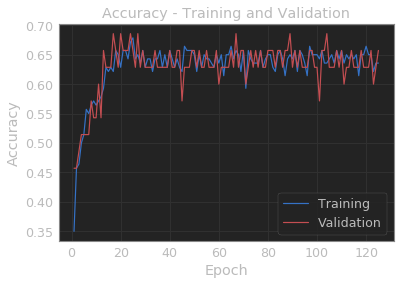

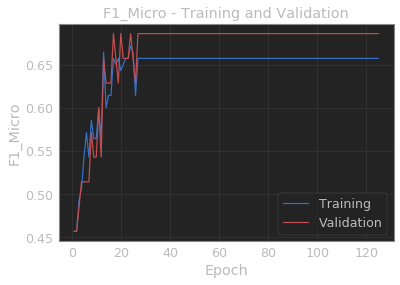

wandb run finished
Run took -40.5 seconds
RUN NUMBER 8/10


Train on 140 samples, validate on 35 samples
Epoch 1/125
 - 2s - loss: 1.3253 - accuracy: 0.4357 - val_loss: 1.2809 - val_accuracy: 0.4571
— f1_micro: 0.4571 — val_f1_micro: 0.4571
Epoch 2/125
 - 0s - loss: 1.2884 - accuracy: 0.4571 - val_loss: 1.2784 - val_accuracy: 0.4571
— f1_micro: 0.4571 — val_f1_micro: 0.4571
Epoch 3/125
 - 0s - loss: 1.2562 - accuracy: 0.4571 - val_loss: 1.2503 - val_accuracy: 0.5143
— f1_micro: 0.4929 — val_f1_micro: 0.5143
Epoch 4/125
 - 0s - loss: 1.2259 - accuracy: 0.5143 - val_loss: 1.2128 - val_accuracy: 0.5143
— f1_micro: 0.5143 — val_f1_micro: 0.5143
Epoch 5/125
 - 0s - loss: 1.1913 - accuracy: 0.5000 - val_loss: 1.1869 - val_accuracy: 0.4571
— f1_micro: 0.4714 — val_f1_micro: 0.4571
Epoch 6/125
 - 0s - loss: 1.1780 - accuracy: 0.4786 - val_loss: 1.1652 - val_accuracy: 0.4857
— f1_micro: 0.4929 — val_f1_micro: 0.4857
Epoch 7/125
 - 0s - loss: 1.1507 - accuracy: 0.5071 - val_loss: 1.1356 - val_accuracy: 0.5143
— f1_micro: 0.5429 — val_f1_micro: 0.5143
Epo

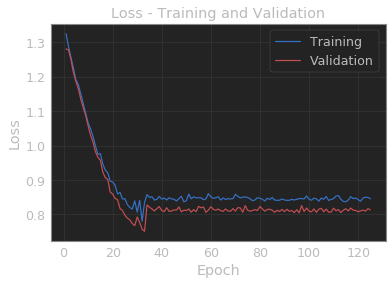

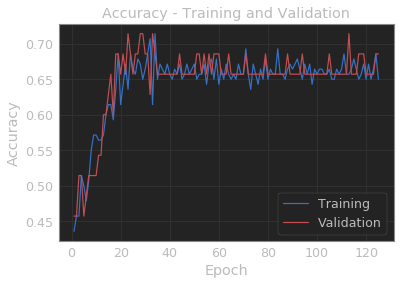

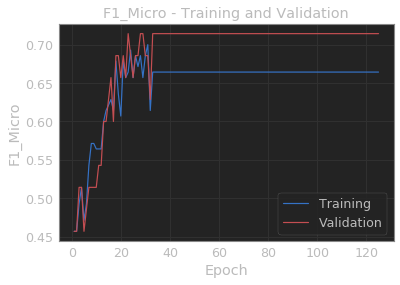

wandb run finished
Run took -41.9 seconds
RUN NUMBER 9/10


Train on 140 samples, validate on 35 samples
Epoch 1/125
 - 2s - loss: 1.3248 - accuracy: 0.4071 - val_loss: 1.2969 - val_accuracy: 0.4571
— f1_micro: 0.4571 — val_f1_micro: 0.4571
Epoch 2/125
 - 0s - loss: 1.3115 - accuracy: 0.4571 - val_loss: 1.2802 - val_accuracy: 0.4571
— f1_micro: 0.4571 — val_f1_micro: 0.4571
Epoch 3/125
 - 0s - loss: 1.2485 - accuracy: 0.4571 - val_loss: 1.2566 - val_accuracy: 0.4571
— f1_micro: 0.4571 — val_f1_micro: 0.4571
Epoch 4/125
 - 0s - loss: 1.2565 - accuracy: 0.4571 - val_loss: 1.2378 - val_accuracy: 0.5143
— f1_micro: 0.5429 — val_f1_micro: 0.5143
Epoch 5/125
 - 0s - loss: 1.2147 - accuracy: 0.5214 - val_loss: 1.2044 - val_accuracy: 0.4857
— f1_micro: 0.4857 — val_f1_micro: 0.4857
Epoch 6/125
 - 0s - loss: 1.1946 - accuracy: 0.4786 - val_loss: 1.1879 - val_accuracy: 0.4571
— f1_micro: 0.4714 — val_f1_micro: 0.4571
Epoch 7/125
 - 0s - loss: 1.1692 - accuracy: 0.4786 - val_loss: 1.1590 - val_accuracy: 0.5143
— f1_micro: 0.5071 — val_f1_micro: 0.5143
Epo

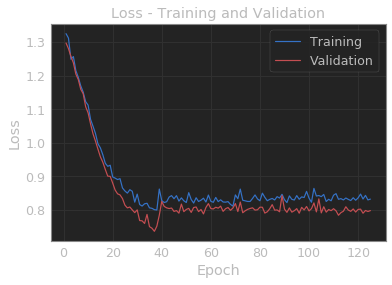

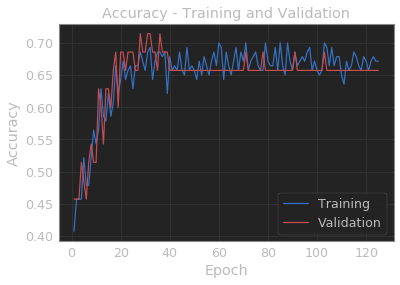

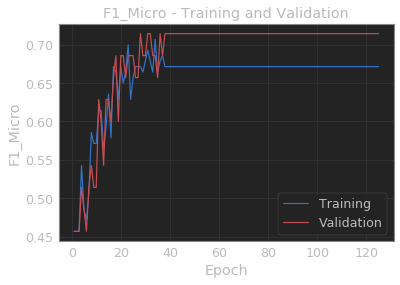

wandb run finished
Run took -43.9 seconds
RUN NUMBER 10/10


wandb run finished


KeyboardInterrupt: 

In [3]:
config = load_default_config()

num_runs = 1
for i in range(num_runs):
    print(f'RUN NUMBER {i+1}/{num_runs}')
    start = time.time()
    history = train(config)
    end = time.time()
    print(f'Run took {start - end:.1f} seconds')
    
    # print("Seed: {}".format(config.data_processing.seed))
    

In [47]:
con

# KFold Cross Val

In [2]:
from utils import train_kfold

E0506 13:38:17.039793 139635494659904 jupyter.py:137] Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
FOLD 1/5
wandb: Currently logged in as: theadammurphy (use `wandb login --relogin` to force relogin)


W0506 13:38:21.729726 139635494659904 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0506 13:38:23.503825 139635494659904 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

Train on 140 samples, validate on 35 samples
Epoch 1/10
 - 1s - loss: 1.7233 - accuracy: 0.3429 - val_loss: 1.5460 - val_accuracy: 0.2000
— f1_micro: 0.2214 — val_f1_micro: 0.2
Epoch 2/10
 - 0s - loss: 1.4317 - accuracy: 0.3286 - val_loss: 1.0943 - val_accuracy: 0.6571
— f1_micro: 0.4071 — val_f1_micro: 0.6571
Epoch 3/10
 - 0s - loss: 1.3201 - accuracy: 0.4071 - val_loss: 1.1490 - v

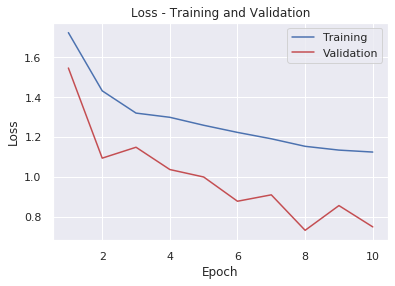

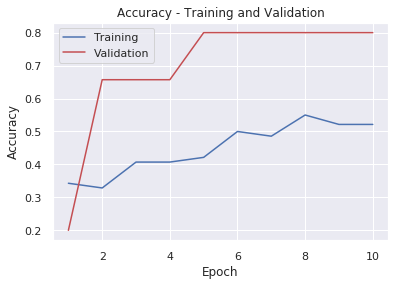

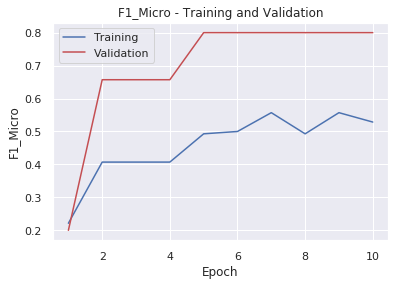

FOLD 2/5


Train on 140 samples, validate on 35 samples
Epoch 1/10
 - 2s - loss: 1.9328 - accuracy: 0.3500 - val_loss: 1.2863 - val_accuracy: 0.6000
— f1_micro: 0.6286 — val_f1_micro: 0.6
Epoch 2/10
 - 0s - loss: 1.3386 - accuracy: 0.4786 - val_loss: 1.3833 - val_accuracy: 0.4000
— f1_micro: 0.4714 — val_f1_micro: 0.4
Epoch 3/10
 - 0s - loss: 1.2681 - accuracy: 0.4714 - val_loss: 1.3628 - val_accuracy: 0.4000
— f1_micro: 0.4714 — val_f1_micro: 0.4
Epoch 4/10
 - 0s - loss: 1.2374 - accuracy: 0.4714 - val_loss: 1.2848 - val_accuracy: 0.4000
— f1_micro: 0.4714 — val_f1_micro: 0.4
Epoch 5/10
 - 0s - loss: 1.1781 - accuracy: 0.4714 - val_loss: 1.2552 - val_accuracy: 0.4000
— f1_micro: 0.4857 — val_f1_micro: 0.4
Epoch 6/10
 - 0s - loss: 1.1356 - accuracy: 0.5071 - val_loss: 1.2045 - val_accuracy: 0.4571
— f1_micro: 0.5571 — val_f1_micro: 0.4571
Epoch 7/10
 - 0s - loss: 1.0705 - accuracy: 0.5714 - val_loss: 1.2299 - val_accuracy: 0.4286
— f1_micro: 0.5643 — val_f1_micro: 0.4286
Epoch 8/10
 - 0s - loss: 

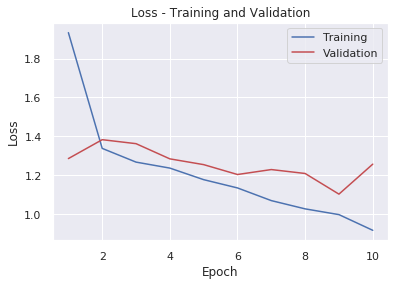

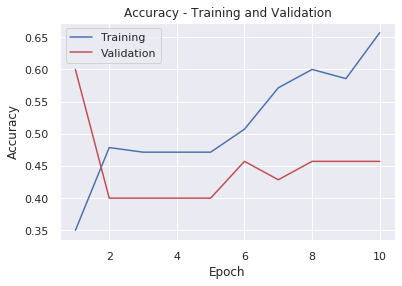

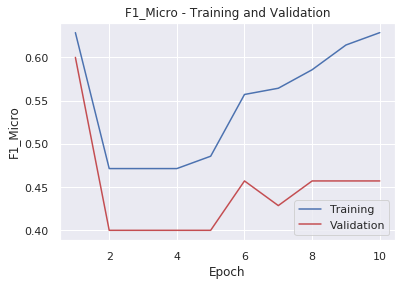

FOLD 3/5


Train on 140 samples, validate on 35 samples
Epoch 1/10
 - 2s - loss: 2.2095 - accuracy: 0.2857 - val_loss: 1.5519 - val_accuracy: 0.2000
— f1_micro: 0.2071 — val_f1_micro: 0.2
Epoch 2/10
 - 0s - loss: 1.3629 - accuracy: 0.2857 - val_loss: 1.3767 - val_accuracy: 0.4000
— f1_micro: 0.4714 — val_f1_micro: 0.4
Epoch 3/10
 - 0s - loss: 1.2797 - accuracy: 0.4714 - val_loss: 1.3134 - val_accuracy: 0.4000
— f1_micro: 0.4714 — val_f1_micro: 0.4
Epoch 4/10
 - 0s - loss: 1.2684 - accuracy: 0.4714 - val_loss: 1.2949 - val_accuracy: 0.4000
— f1_micro: 0.4714 — val_f1_micro: 0.4
Epoch 5/10
 - 0s - loss: 1.2319 - accuracy: 0.4714 - val_loss: 1.2875 - val_accuracy: 0.4000
— f1_micro: 0.4714 — val_f1_micro: 0.4
Epoch 6/10
 - 0s - loss: 1.1957 - accuracy: 0.4714 - val_loss: 1.2981 - val_accuracy: 0.4000
— f1_micro: 0.4714 — val_f1_micro: 0.4
Epoch 7/10
 - 0s - loss: 1.1764 - accuracy: 0.4786 - val_loss: 1.2770 - val_accuracy: 0.4286
— f1_micro: 0.5286 — val_f1_micro: 0.4286
Epoch 8/10
 - 0s - loss: 1.1

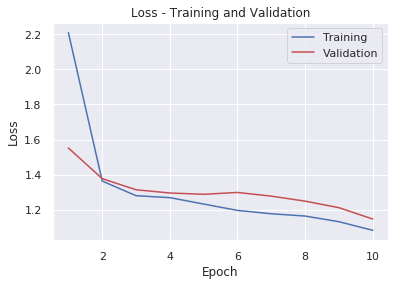

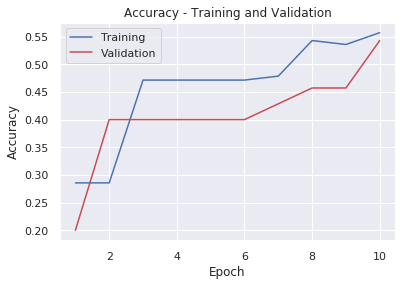

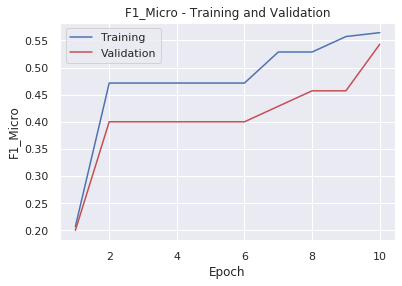

FOLD 4/5


Train on 140 samples, validate on 35 samples
Epoch 1/10
 - 2s - loss: 2.1256 - accuracy: 0.4929 - val_loss: 1.5954 - val_accuracy: 0.1143
— f1_micro: 0.2286 — val_f1_micro: 0.1143
Epoch 2/10
 - 0s - loss: 1.3904 - accuracy: 0.2786 - val_loss: 1.3596 - val_accuracy: 0.2000
— f1_micro: 0.3 — val_f1_micro: 0.2
Epoch 3/10
 - 0s - loss: 1.3284 - accuracy: 0.3143 - val_loss: 1.3105 - val_accuracy: 0.4857
— f1_micro: 0.4643 — val_f1_micro: 0.4857
Epoch 4/10
 - 0s - loss: 1.3011 - accuracy: 0.4500 - val_loss: 1.2608 - val_accuracy: 0.4857
— f1_micro: 0.45 — val_f1_micro: 0.4857
Epoch 5/10
 - 0s - loss: 1.2576 - accuracy: 0.4500 - val_loss: 1.2462 - val_accuracy: 0.4857
— f1_micro: 0.45 — val_f1_micro: 0.4857
Epoch 6/10
 - 0s - loss: 1.2251 - accuracy: 0.4500 - val_loss: 1.2233 - val_accuracy: 0.4857
— f1_micro: 0.45 — val_f1_micro: 0.4857
Epoch 7/10
 - 0s - loss: 1.2014 - accuracy: 0.4714 - val_loss: 1.2401 - val_accuracy: 0.4857
— f1_micro: 0.5214 — val_f1_micro: 0.4857
Epoch 8/10
 - 0s - los

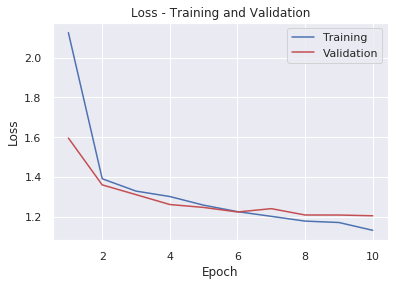

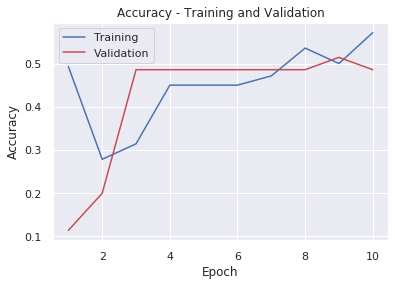

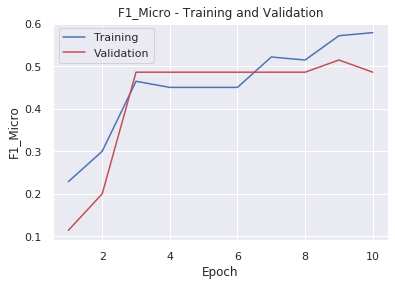

FOLD 5/5


Train on 140 samples, validate on 35 samples
Epoch 1/10
 - 2s - loss: 1.6850 - accuracy: 0.4357 - val_loss: 1.3743 - val_accuracy: 0.3429
— f1_micro: 0.4857 — val_f1_micro: 0.3429
Epoch 2/10
 - 0s - loss: 1.2844 - accuracy: 0.5571 - val_loss: 1.3671 - val_accuracy: 0.3429
— f1_micro: 0.4857 — val_f1_micro: 0.3429
Epoch 3/10
 - 0s - loss: 1.3060 - accuracy: 0.4857 - val_loss: 1.3555 - val_accuracy: 0.3429
— f1_micro: 0.4857 — val_f1_micro: 0.3429
Epoch 4/10
 - 0s - loss: 1.2572 - accuracy: 0.4857 - val_loss: 1.2950 - val_accuracy: 0.3429
— f1_micro: 0.4857 — val_f1_micro: 0.3429
Epoch 5/10
 - 0s - loss: 1.1925 - accuracy: 0.4857 - val_loss: 1.3134 - val_accuracy: 0.3429
— f1_micro: 0.4857 — val_f1_micro: 0.3429
Epoch 6/10
 - 0s - loss: 1.1502 - accuracy: 0.4857 - val_loss: 1.2193 - val_accuracy: 0.4000
— f1_micro: 0.5071 — val_f1_micro: 0.4
Epoch 7/10
 - 0s - loss: 1.0805 - accuracy: 0.5357 - val_loss: 1.2766 - val_accuracy: 0.3429
— f1_micro: 0.4857 — val_f1_micro: 0.3429
Epoch 8/10
 -

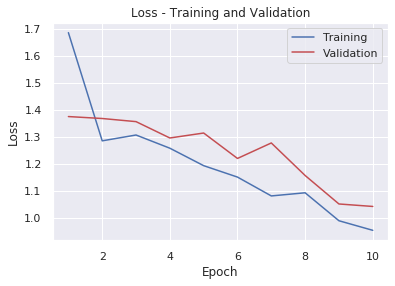

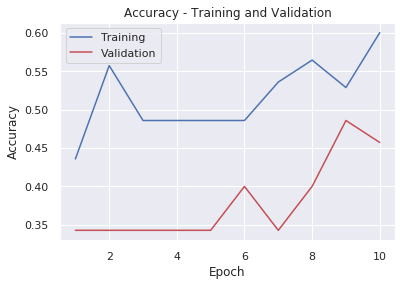

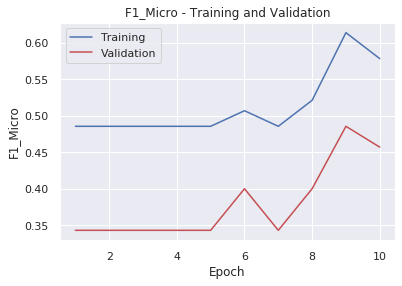

In [3]:
config = load_default_config()

train_kfold(config)

# Plotting Incorrect Predictions

Load, split, build, fit, make predictions and I want to know which ones are correct and which are not

In [2]:
from utils import load_scale_reshape_X_y, split_X_y, build_model, \
                  fit_model

In [53]:
config = load_default_config()

In [54]:
# Load and scale
X, y = load_scale_reshape_X_y(config)
# Split
X_train, X_val, y_train, y_val = split_X_y(config, X, y)

X_train = X_train[:, :, 501:]
X_val = X_val[:, :, 501:]

model = build_model(config)

wandb_enable = config.get('wandb', True)
if(wandb_enable):
    wandb_run = wandb.init(project='electrochemistry',
                    config=config)

history = fit_model(config, model, X_train, X_val, y_train, y_val)

ValueError: Found input variables with inconsistent numbers of samples: [350, 175]

In [5]:
def make_predictions(model, data):
    pred_proba = model.predict(data)
    pred_int = [np.argmax(p) for p in pred_proba]
    # preds = to_categorical(pred_int, num_classes=4)
    return np.array(pred_int)

In [6]:
val_preds = make_predictions(model, X_val)
val_true = np.array([np.argmax(ohe_value) for ohe_value in y_val])

In [24]:
sum(val_preds != val_true) / len(val_preds)

0.3142857142857143

In [25]:
wrong_val_preds = X_val[val_preds != val_true]

In [9]:
class_name_to_int = {'Cd': 0, 'Cu': 1, 'Pb': 2, 'Sw': 3}
class_int_to_name = {i: name for name, i in class_name_to_int.items()}

In [28]:
class_int_to_name

{0: 'Cd', 1: 'Cu', 2: 'Pb', 3: 'Sw'}

In [10]:
val_preds[0]

3

In [11]:
class_int_to_name[val_preds[0]]

'Sw'

In [12]:
len(X_val[val_preds == val_true]) / len(X_val)

0.7142857142857143

In [7]:
def plot_preds_vs_actuals(model, X, y, plot_kind='all'):
    """
    Plots X data coloured green or red depending on whether the model made a correct prediction or not.
    
    * model - a trained Keras model
    * X - X data in a shape that Keras will accept e.g. (samples, 1, timesteps) if using an Attention model
    * y - y data in a shape that Keras will accept
    * plot_kind - str default 'all', options are 'all', 'correct', 'incorrect' - specify if you just want to plot 
                  correct or incorrect predictions. 
    """
    # Get predictions and true values in a shape matplotlib likes
    val_preds = make_predictions(model, X)
    val_true = np.array([np.argmax(ohe_value) for ohe_value in y])
    
    accuracy = len(X[val_preds == val_true]) / len(X)
    num_correct = len(X[val_preds == val_true])
    num_incorrect = len(X[val_preds != val_true])
    print(f'NUM CORRECT: {num_correct}/{len(X)}')
    print(f'NUM INCORRECT: {num_incorrect}/{len(X)}')
    print(f'ACCURACY:', accuracy)
    
    for i in range(len(X)):
        # Get names for pred and true values
        pred_name = class_int_to_name[val_preds[i]]
        true_name = class_int_to_name[val_true[i]]
        
        if pred_name == true_name:
            color = 'green'
        else:
            color = 'red'
            
        data_to_plot = X[i].reshape(-1,)
        title = f'Predicted {pred_name} - Actual {true_name}'
        
        if plot_kind.lower() == 'all':
            plt.plot(data_to_plot, color)
            plt.title(title)
            plt.show()
        elif plot_kind.lower() == 'incorrect' and color == 'red':
            plt.plot(data_to_plot, color)
            plt.title(title)
            plt.show()
        elif plot_kind.lower() == 'correct' and color == 'green':
            plt.plot(data_to_plot, color)
            plt.title(title)
            plt.show()
        else:
            pass

NUM CORRECT: 23/35
NUM INCORRECT: 12/35
ACCURACY: 0.6571428571428571


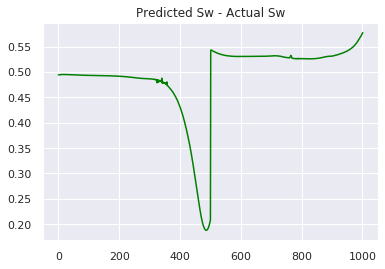

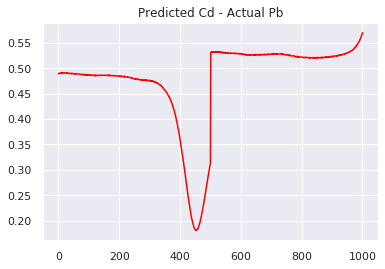

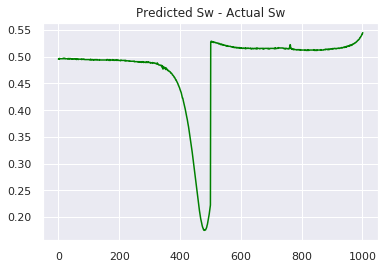

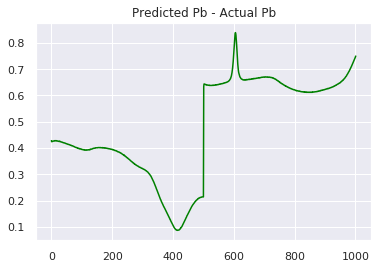

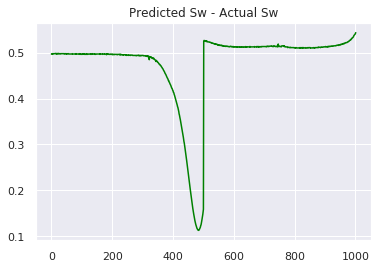

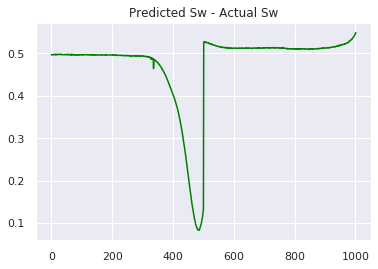

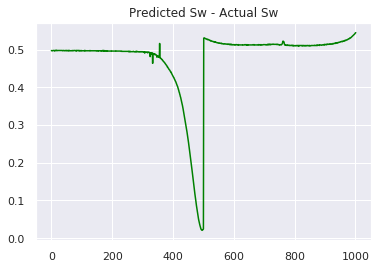

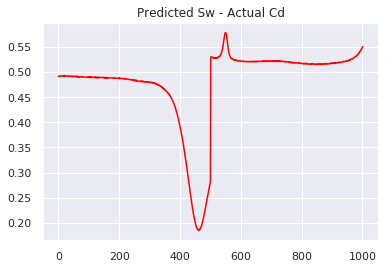

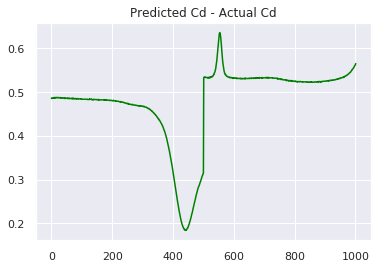

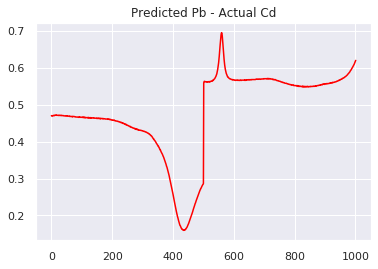

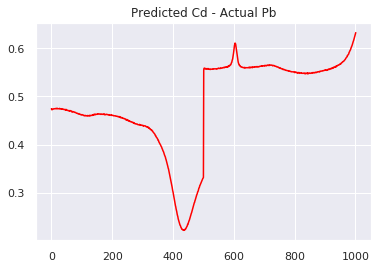

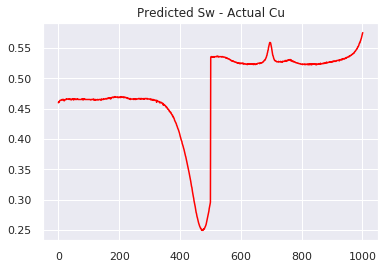

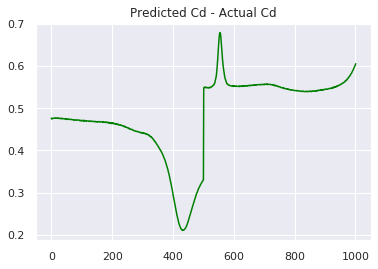

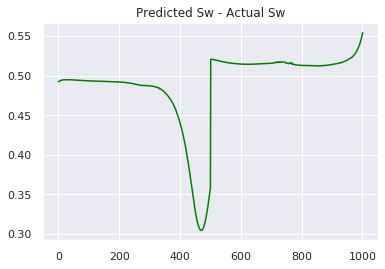

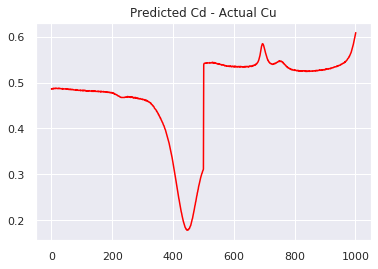

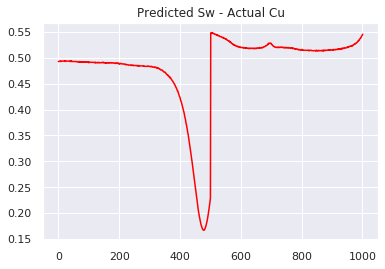

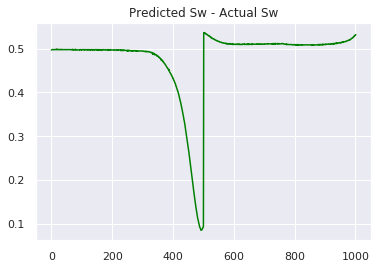

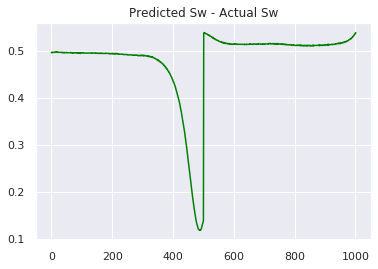

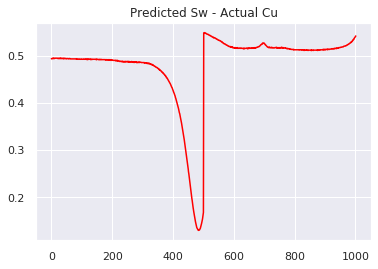

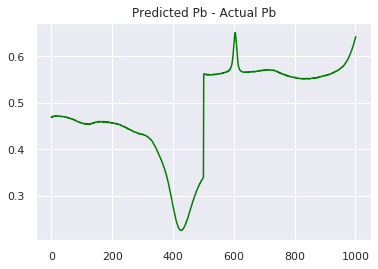

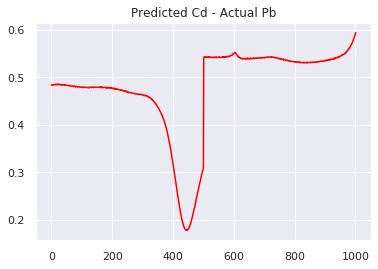

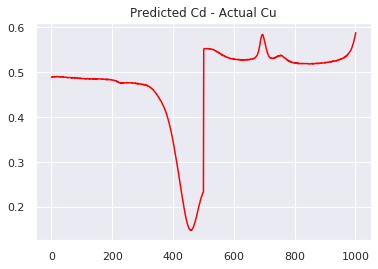

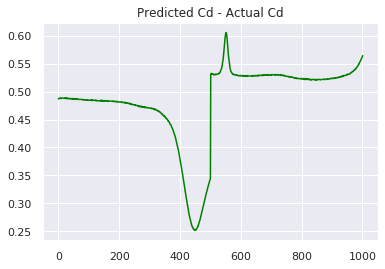

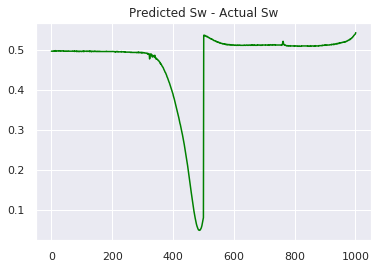

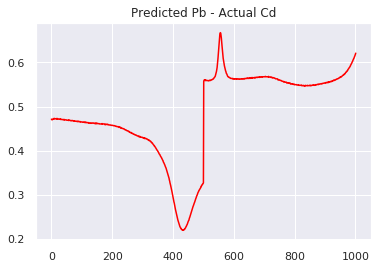

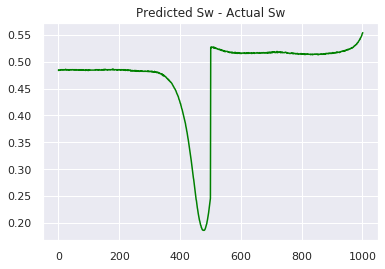

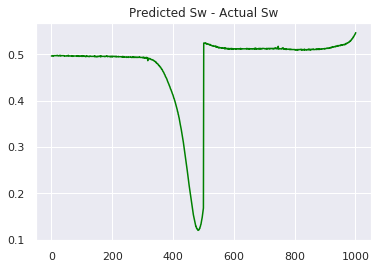

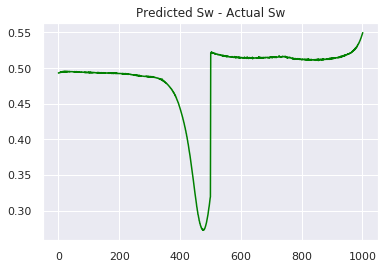

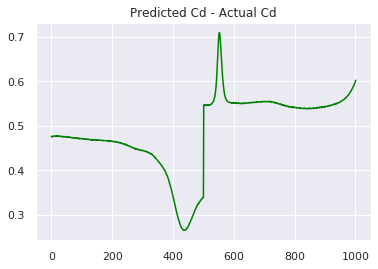

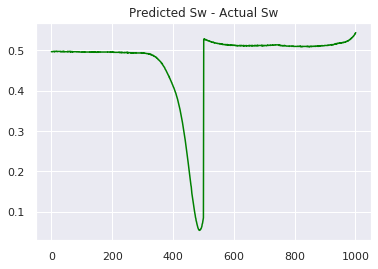

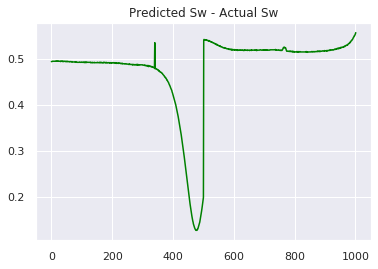

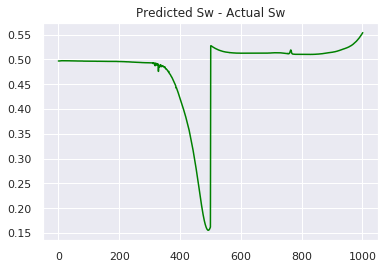

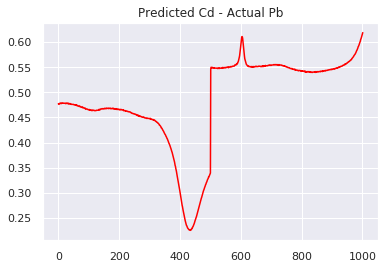

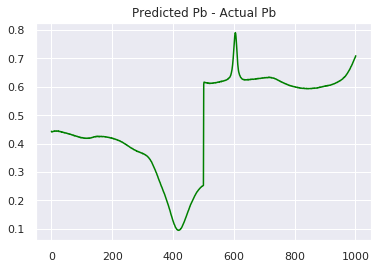

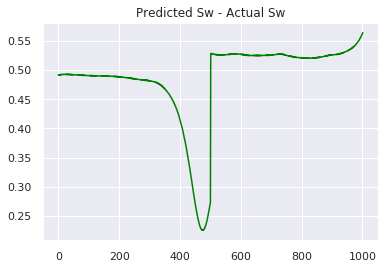

In [53]:
plot_preds_vs_actuals(model, X_val, y_val, plot_kind='all')

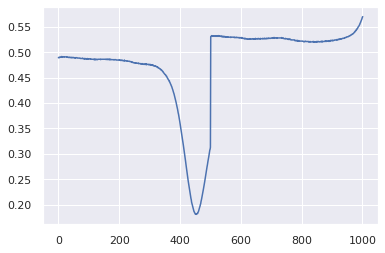

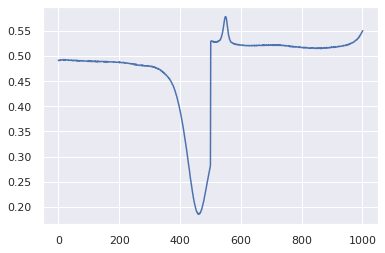

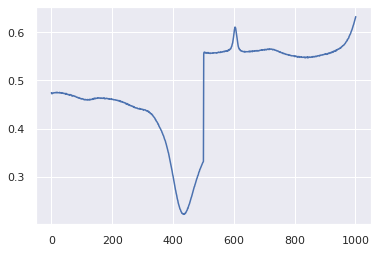

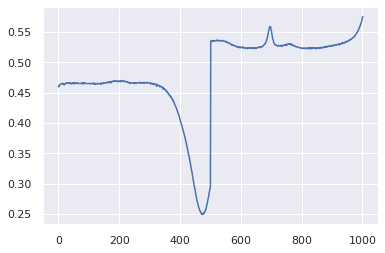

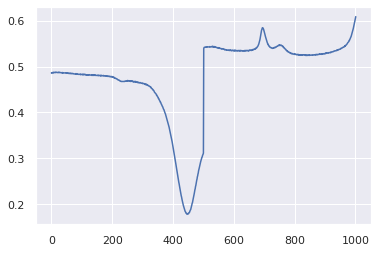

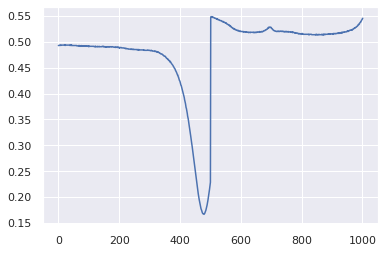

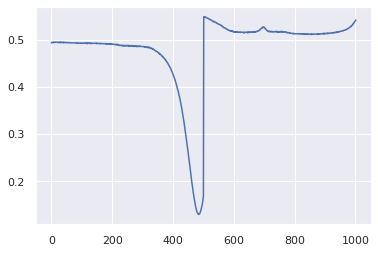

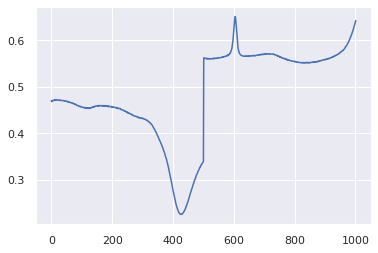

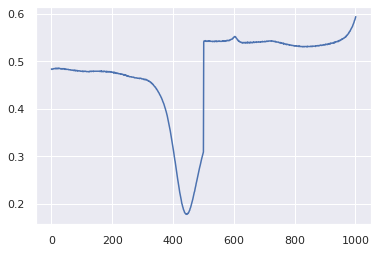

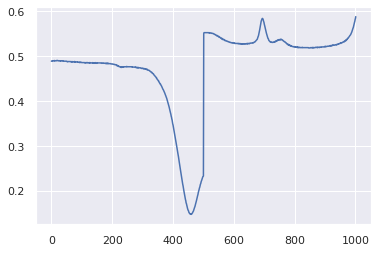

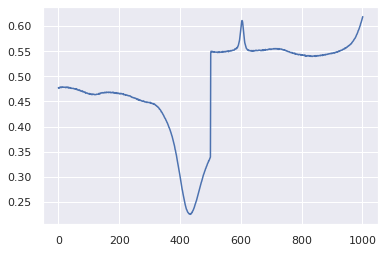

In [12]:
for wvp in wrong_val_preds:
    plt.plot(wvp[0].reshape(-1,))
    plt.show()

In [60]:
class_int_to_name

{0: 'Cd', 1: 'Cu', 2: 'Pb', 3: 'Sw'}

In [61]:
val_true

array([3, 2, 3, 2, 3, 3, 3, 0, 0, 0, 2, 1, 0, 3, 1, 1, 3, 3, 1, 2, 2, 1,
       0, 3, 0, 3, 3, 3, 0, 3, 3, 3, 2, 2, 3])

In [63]:
[class_int_to_name[y] for y in val_true]

['Sw',
 'Pb',
 'Sw',
 'Pb',
 'Sw',
 'Sw',
 'Sw',
 'Cd',
 'Cd',
 'Cd',
 'Pb',
 'Cu',
 'Cd',
 'Sw',
 'Cu',
 'Cu',
 'Sw',
 'Sw',
 'Cu',
 'Pb',
 'Pb',
 'Cu',
 'Cd',
 'Sw',
 'Cd',
 'Sw',
 'Sw',
 'Sw',
 'Cd',
 'Sw',
 'Sw',
 'Sw',
 'Pb',
 'Pb',
 'Sw']

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(val_true, val_preds)

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(cm, display_labels=list(class_int_to_name.values()))

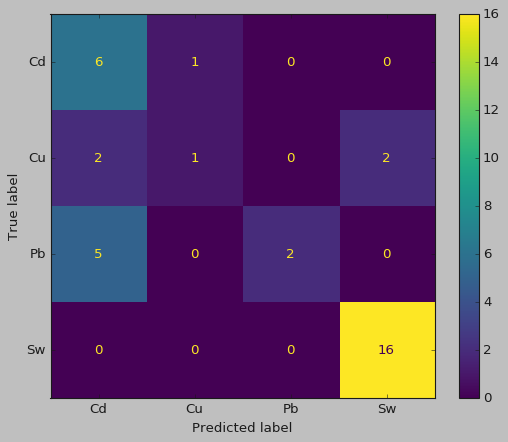

In [26]:
plt.style.use('classic')
cmd.plot()

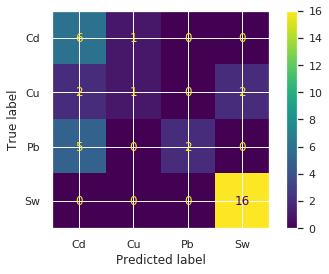

In [25]:
cmd.plot()

CONFUSION MATRIX - MODEL TRAINED WITH CLASS_WEIGHTS


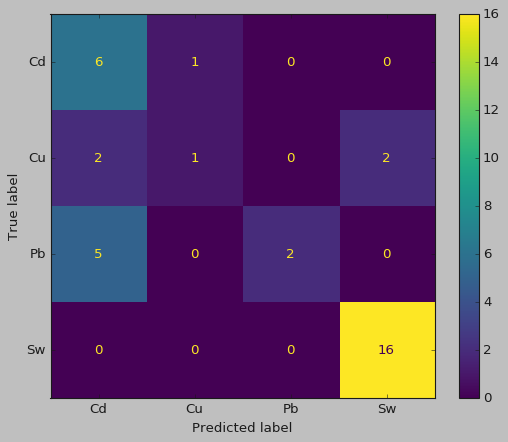

In [36]:
plt.style.use('classic')
print('CONFUSION MATRIX - MODEL TRAINED WITH CLASS_WEIGHTS')
val_preds = make_predictions(model, X_val)
val_true = np.array([np.argmax(ohe_value) for ohe_value in y_val])
cm_val = confusion_matrix(val_true, val_preds)
cmd_val = ConfusionMatrixDisplay(cm, display_labels=list(class_int_to_name.values()))
cmd_val.plot()

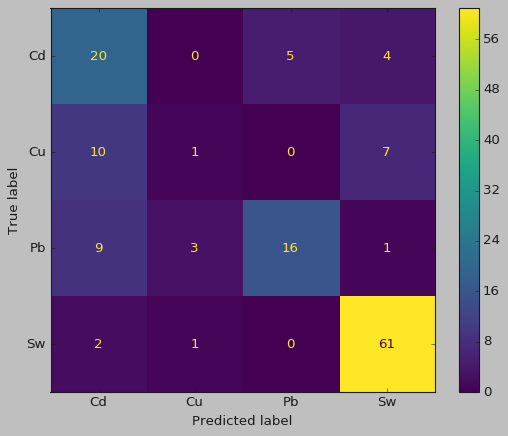

In [27]:
train_preds = make_predictions(model, X_train)
train_true = np.array([np.argmax(ohe_value) for ohe_value in y_train])
cm_train = confusion_matrix(train_true, train_preds)
cmd_train = ConfusionMatrixDisplay(cm_train, display_labels=list(class_int_to_name.values()))
cmd_train.plot()

CONFUSION MATRIX - MODEL TRAINED WITH CLASS_WEIGHTS


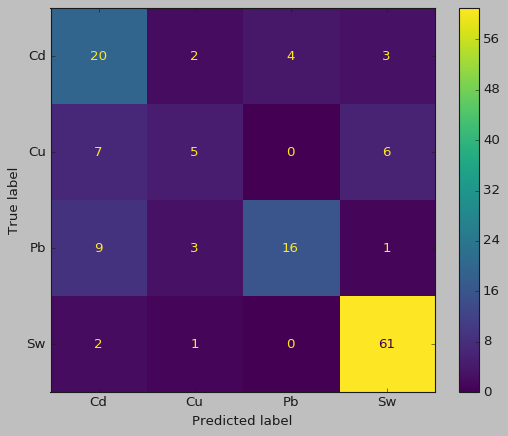

In [37]:
print('CONFUSION MATRIX - MODEL TRAINED WITH CLASS_WEIGHTS')
train_preds = make_predictions(model, X_train)
train_true = np.array([np.argmax(ohe_value) for ohe_value in y_train])
cm_train = confusion_matrix(train_true, train_preds)
cmd_train = ConfusionMatrixDisplay(cm_train, display_labels=list(class_int_to_name.values()))
cmd_train.plot()

In [45]:
X_val[0].reshape(-1,)[501:]

array([0.54146777, 0.54342013, 0.54302965, 0.54263919, 0.54232681,
       0.54193634, 0.54162396, 0.54131159, 0.54099921, 0.54068684,
       0.54029637, 0.539984  , 0.53974971, 0.53943734, 0.53912496,
       0.53889069, 0.53857831, 0.53826594, 0.53810975, 0.53779738,
       0.537485  , 0.53725071, 0.53709452, 0.53678215, 0.53654788,
       0.53631359, 0.5361574 , 0.53592312, 0.53568884, 0.53537646,
       0.53522028, 0.53506409, 0.5349079 , 0.53467363, 0.53451744,
       0.53428315, 0.53420506, 0.53389269, 0.53381459, 0.53358031,
       0.53350221, 0.53334602, 0.53318984, 0.53311175, 0.53295556,
       0.53287746, 0.53264319, 0.53256509, 0.532487  , 0.53233081,
       0.53225271, 0.53217463, 0.53209653, 0.53201844, 0.53186225,
       0.53186225, 0.53170606, 0.53170606, 0.53162796, 0.53147177,
       0.53139369, 0.53147177, 0.53131559, 0.5312375 , 0.5312375 ,
       0.5312375 , 0.53108131, 0.53100321, 0.53100321, 0.53100321,
       0.53092512, 0.53100321, 0.53084703, 0.53084703, 0.53084

In [48]:
X_val[:, :, 501:].shape

(35, 1, 501)

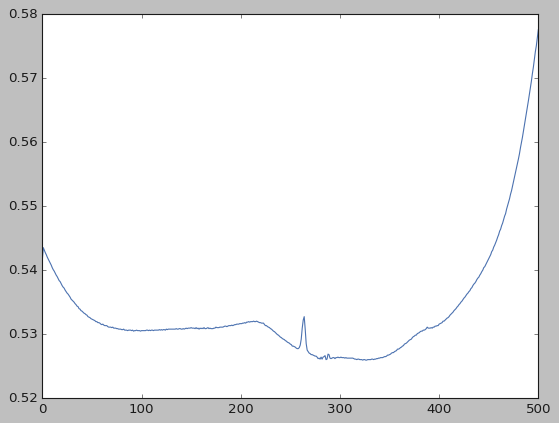

In [46]:
plt.plot(X_val[0].reshape(-1,)[501:])
plt.show()

In [19]:
from utils import scale_df_X_to_range
from sklearn.preprocessing import LabelEncoder
# Load df
df = pd.read_csv(DATA_DIR / 'four_class_dataset.csv', index_col=0)

# Scale X row-wise
df_X = df.iloc[:, :-1]
df_X_scaled = scale_df_X_to_range(df_X, 0, 1)
# # Reshape into Keras-readable format
# new_shape = list(input_shape)
# new_shape.insert(0, -1)
# X = df_X_scaled.values.reshape(new_shape)

X = df_X_scaled.values

# Transform y into Keras-readable format
y = df.iloc[:, -1].values
print('y before scaling', y)
print()
le = LabelEncoder()
y = le.fit_transform(y)
print('y after scaling', y)

y before scaling ['Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu'
 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cd' 'Cd' 'Cd' 'Cd' 'Cd'
 'Cd' 'Cd' 'Cd' 'Cd' 'Cd' 'Cd' 'Cd' 'Cd' 'Cd' 'Cd' 'Cd' 'Cd' 'Cd' 'Cd'
 'Cd' 'Cd' 'Cd' 'Cd' 'Cd' 'Cd' 'Cd' 'Cd' 'Cd' 'Cd' 'Cd' 'Cd' 'Cd' 'Cd'
 'Cd' 'Cd' 'Cd' 'Pb' 'Pb' 'Pb' 'Pb' 'Pb' 'Pb' 'Pb' 'Pb' 'Pb' 'Pb' 'Pb'
 'Pb' 'Pb' 'Pb' 'Pb' 'Pb' 'Pb' 'Pb' 'Pb' 'Pb' 'Pb' 'Pb' 'Pb' 'Pb' 'Pb'
 'Pb' 'Pb' 'Pb' 'Pb' 'Pb' 'Pb' 'Pb' 'Pb' 'Pb' 'Pb' 'Pb' 'Sw' 'Sw' 'Sw'
 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw'
 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw'
 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw'
 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw'
 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw'
 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw' 'Sw']

y after scaling [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0

# Plotting First Fold in KFold

In [4]:
from utils import load_scale_reshape_X_y_ATTENTION
from sklearn.model_selection import KFold

In [6]:
X, y = load_scale_reshape_X_y_ATTENTION(a=0, b=1, input_shape=(1, 1002))
n_splits = 5
shuffle = True
seed = 7

kfold = KFold(n_splits=n_splits, shuffle=shuffle, random_state=seed)
fold_number = 1
for train_idx, val_idx in kfold.split(X, y):
    print(f'FOLD {fold_number}/{n_splits}')
    # Get folds using indices
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # Transform into Keras shape
    X_train = X_train.reshape(-1, 1, 1002)
    X_val = X_val.reshape(-1, 1, 1002)
    y_train = to_categorical(y_train, num_classes=4)
    y_val = to_categorical(y_val, num_classes=4)
    fold_number += 1
    if fold_number > 1:
        break

FOLD 1/5


2

In [ ]:
    # Load data
    X, y = load_scale_reshape_X_y_ATTENTION(a=0, b=1, input_shape=(1, 1002))
    # Get constants for KFold
    config_dp = config.data_processing
    seed = config_dp.get('seed', DEFAULT_SEED)
    shuffle = config_dp.get('shuffle', True)
    n_splits = config_dp.get('n_splits', DEFAULT_SPLITS)

    if(shuffle and seed is None):
        # seed supplied explicitly as None, generate random seed
        seed = randint(0, 1024)
        config_dp['seed'] = seed
   
    # Initialize KFold
    kfold = KFold(n_splits=n_splits, shuffle=shuffle, random_state=seed)
    
    fold_number = 1
    for train_idx, val_idx in kfold.split(X, y):
        print(f'FOLD {fold_number}/{n_splits}')
        # Get folds using indices
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # Transform into Keras shape
        X_train = X_train.reshape(-1, 1, 1002)
        X_val = X_val.reshape(-1, 1, 1002)
        y_train = to_categorical(y_train, num_classes=4)
        y_val = to_categorical(y_val, num_classes=4)

        # Initialize wandb
        wandb_enable = config.get('wandb', True)
        if(wandb_enable):
            wandb_run = wandb.init(project='electrochemistry',
                                   config=config)

        model = build_model(config)
        history = fit_model(config, model, X_train, X_val, y_train, y_val)
        # Plot loss, accuracy and f1_micro curves
        loss_fig = plot_metric(history, metric='loss', start_epoch=config.plotting['start_plotting_epoch'])
        acc_fig = plot_metric(history, metric='accuracy', start_epoch=config.plotting['start_plotting_epoch'])
        f1_fig = plot_metric(history, metric='f1_micro', start_epoch=config.plotting['start_plotting_epoch'])
        # Upload plots to wandb
        if(wandb_enable):
            fig_dict = {'Loss - Training and Validation': loss_fig,
                        'Accuracy - Training and Validation': acc_fig,
                        'F1_Micro - Training and Validation': f1_fig}
            # Store history and figures on wandb
            upload_to_wandb(history, fig_dict)
            wandb_run.finish()

        fold_number += 1

# Train with Different Datasets

RUN 1/5
wandb: Currently logged in as: theadammurphy (use `wandb login --relogin` to force relogin)


uracy: 0.6571
— f1_micro: 0.65 — val_f1_micro: 0.7143
Epoch 54/200
 - 0s - loss: 0.8690 - accuracy: 0.6500 - val_loss: 0.8249 - val_accuracy: 0.6857
— f1_micro: 0.65 — val_f1_micro: 0.7143
Epoch 55/200
 - 0s - loss: 0.8694 - accuracy: 0.6429 - val_loss: 0.8246 - val_accuracy: 0.6571
— f1_micro: 0.65 — val_f1_micro: 0.7143
Epoch 56/200
 - 0s - loss: 0.8712 - accuracy: 0.6571 - val_loss: 0.8238 - val_accuracy: 0.6571
— f1_micro: 0.65 — val_f1_micro: 0.7143
Epoch 57/200
 - 0s - loss: 0.8697 - accuracy: 0.6643 - val_loss: 0.8229 - val_accuracy: 0.6571
— f1_micro: 0.65 — val_f1_micro: 0.7143
Epoch 58/200
 - 0s - loss: 0.8778 - accuracy: 0.6357 - val_loss: 0.8254 - val_accuracy: 0.6571
— f1_micro: 0.65 — val_f1_micro: 0.7143
Epoch 59/200
 - 0s - loss: 0.8769 - accuracy: 0.6571 - val_loss: 0.8240 - val_accuracy: 0.6571
— f1_micro: 0.65 — val_f1_micro: 0.7143
Epoch 60/200
 - 0s - loss: 0.8704 - accuracy: 0.6500 - val_loss: 0.8240 - val_accuracy: 0.6571
— f1_micro: 0.65 — val_f1_micro: 0.7143
E

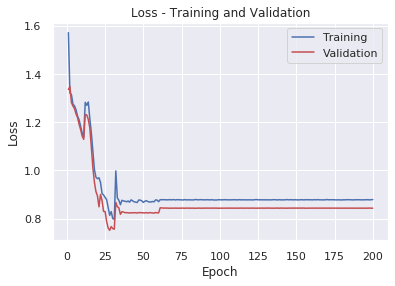

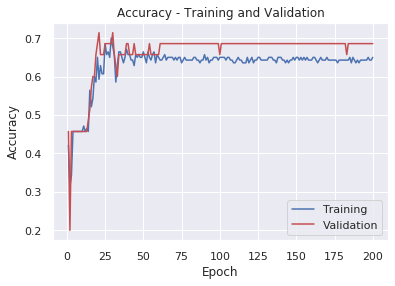

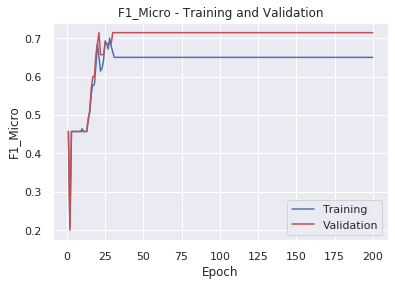

wandb run finished
RUN 2/5


uracy: 0.7143
— f1_micro: 0.65 — val_f1_micro: 0.7143
Epoch 54/200
 - 0s - loss: 0.8302 - accuracy: 0.6571 - val_loss: 0.7927 - val_accuracy: 0.7143
— f1_micro: 0.65 — val_f1_micro: 0.7143
Epoch 55/200
 - 0s - loss: 0.8289 - accuracy: 0.6500 - val_loss: 0.7930 - val_accuracy: 0.6857
— f1_micro: 0.65 — val_f1_micro: 0.7143
Epoch 56/200
 - 0s - loss: 0.8290 - accuracy: 0.6643 - val_loss: 0.7926 - val_accuracy: 0.6857
— f1_micro: 0.65 — val_f1_micro: 0.7143
Epoch 57/200
 - 0s - loss: 0.8292 - accuracy: 0.6500 - val_loss: 0.7922 - val_accuracy: 0.6857
— f1_micro: 0.65 — val_f1_micro: 0.7143
Epoch 58/200
 - 0s - loss: 0.8293 - accuracy: 0.6643 - val_loss: 0.7926 - val_accuracy: 0.6857
— f1_micro: 0.65 — val_f1_micro: 0.7143
Epoch 59/200
 - 0s - loss: 0.8297 - accuracy: 0.6500 - val_loss: 0.7915 - val_accuracy: 0.6857
— f1_micro: 0.65 — val_f1_micro: 0.7143
Epoch 60/200
 - 0s - loss: 0.8298 - accuracy: 0.6500 - val_loss: 0.7918 - val_accuracy: 0.7143
— f1_micro: 0.65 — val_f1_micro: 0.7143
E

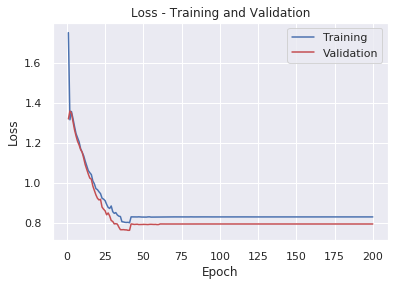

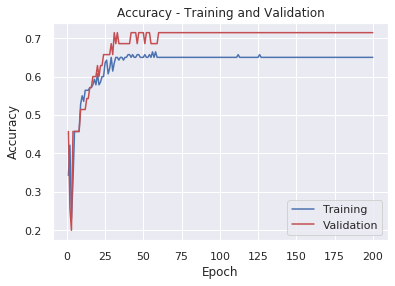

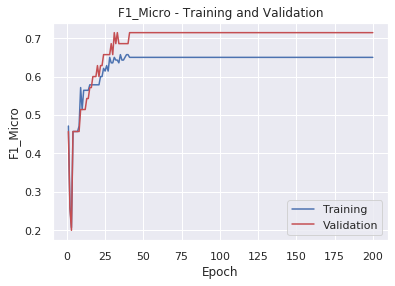

wandb run finished
RUN 3/5


ro: 0.6857 — val_f1_micro: 0.7429
Epoch 56/200
 - 0s - loss: 0.8145 - accuracy: 0.6929 - val_loss: 0.7549 - val_accuracy: 0.7143
— f1_micro: 0.6857 — val_f1_micro: 0.7429
Epoch 57/200
 - 0s - loss: 0.8118 - accuracy: 0.6929 - val_loss: 0.7556 - val_accuracy: 0.6857
— f1_micro: 0.6857 — val_f1_micro: 0.7429
Epoch 58/200
 - 0s - loss: 0.8263 - accuracy: 0.6857 - val_loss: 0.7558 - val_accuracy: 0.6857
— f1_micro: 0.6857 — val_f1_micro: 0.7429
Epoch 59/200
 - 0s - loss: 0.8212 - accuracy: 0.6929 - val_loss: 0.7551 - val_accuracy: 0.6857
— f1_micro: 0.6857 — val_f1_micro: 0.7429
Epoch 60/200
 - 0s - loss: 0.8328 - accuracy: 0.6857 - val_loss: 0.7557 - val_accuracy: 0.6857
— f1_micro: 0.6857 — val_f1_micro: 0.7429
Epoch 61/200
 - 0s - loss: 0.8406 - accuracy: 0.6857 - val_loss: 0.7953 - val_accuracy: 0.7429
— f1_micro: 0.6857 — val_f1_micro: 0.7429
Epoch 62/200
 - 0s - loss: 0.8396 - accuracy: 0.6929 - val_loss: 0.7934 - val_accuracy: 0.7429
— f1_micro: 0.6857 — val_f1_micro: 0.7429
Epoch 6

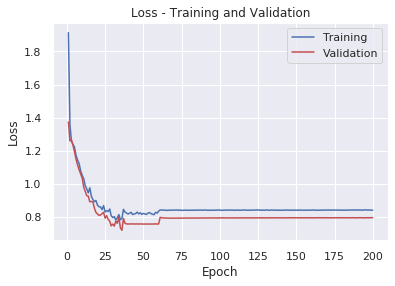

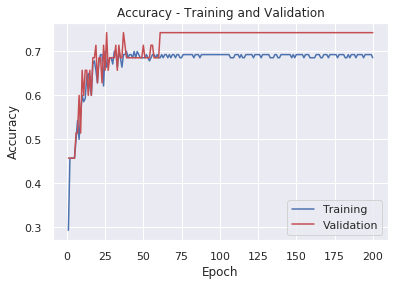

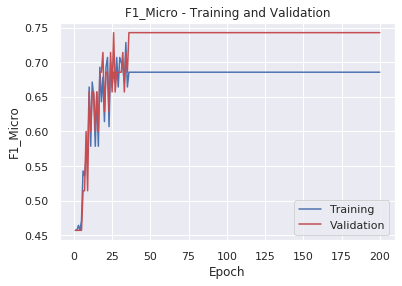

wandb run finished
RUN 4/5


8737 - val_accuracy: 0.6571
— f1_micro: 0.7 — val_f1_micro: 0.6857
Epoch 53/200
 - 0s - loss: 0.9109 - accuracy: 0.6786 - val_loss: 0.8739 - val_accuracy: 0.6571
— f1_micro: 0.7 — val_f1_micro: 0.6857
Epoch 54/200
 - 0s - loss: 0.9118 - accuracy: 0.6643 - val_loss: 0.8729 - val_accuracy: 0.6571
— f1_micro: 0.7 — val_f1_micro: 0.6857
Epoch 55/200
 - 0s - loss: 0.9132 - accuracy: 0.6714 - val_loss: 0.8738 - val_accuracy: 0.6571
— f1_micro: 0.7 — val_f1_micro: 0.6857
Epoch 56/200
 - 0s - loss: 0.9114 - accuracy: 0.6714 - val_loss: 0.8740 - val_accuracy: 0.6571
— f1_micro: 0.7 — val_f1_micro: 0.6857
Epoch 57/200
 - 0s - loss: 0.9128 - accuracy: 0.6786 - val_loss: 0.8745 - val_accuracy: 0.6571
— f1_micro: 0.7 — val_f1_micro: 0.6857
Epoch 58/200
 - 0s - loss: 0.9101 - accuracy: 0.6929 - val_loss: 0.8740 - val_accuracy: 0.6571
— f1_micro: 0.7 — val_f1_micro: 0.6857
Epoch 59/200
 - 0s - loss: 0.9155 - accuracy: 0.6714 - val_loss: 0.8743 - val_accuracy: 0.6571
— f1_micro: 0.7 — val_f1_micro: 0.

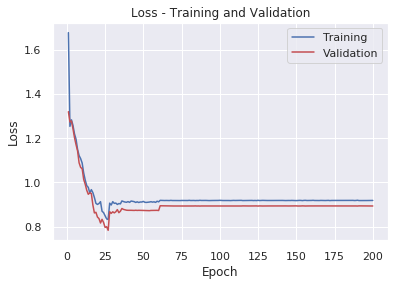

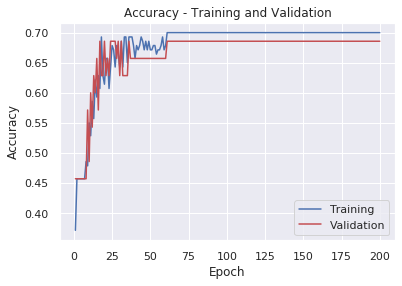

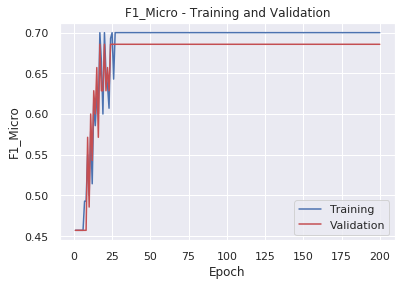

wandb run finished
RUN 5/5


ro: 0.6429 — val_f1_micro: 0.7143
Epoch 56/200
 - 0s - loss: 0.8821 - accuracy: 0.6571 - val_loss: 0.8179 - val_accuracy: 0.6571
— f1_micro: 0.6429 — val_f1_micro: 0.7143
Epoch 57/200
 - 0s - loss: 0.8960 - accuracy: 0.6500 - val_loss: 0.8187 - val_accuracy: 0.6571
— f1_micro: 0.6429 — val_f1_micro: 0.7143
Epoch 58/200
 - 0s - loss: 0.8845 - accuracy: 0.6429 - val_loss: 0.8184 - val_accuracy: 0.6571
— f1_micro: 0.6429 — val_f1_micro: 0.7143
Epoch 59/200
 - 0s - loss: 0.8713 - accuracy: 0.6429 - val_loss: 0.8174 - val_accuracy: 0.6571
— f1_micro: 0.6429 — val_f1_micro: 0.7143
Epoch 60/200
 - 0s - loss: 0.8878 - accuracy: 0.6429 - val_loss: 0.8185 - val_accuracy: 0.6571
— f1_micro: 0.6429 — val_f1_micro: 0.7143
Epoch 61/200
 - 0s - loss: 0.9305 - accuracy: 0.6429 - val_loss: 0.8877 - val_accuracy: 0.6857
— f1_micro: 0.6429 — val_f1_micro: 0.7143
Epoch 62/200
 - 0s - loss: 0.9290 - accuracy: 0.6429 - val_loss: 0.8857 - val_accuracy: 0.6857
— f1_micro: 0.6429 — val_f1_micro: 0.7143
Epoch 6

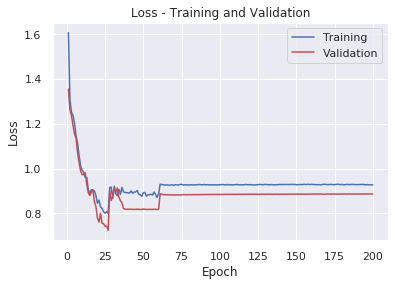

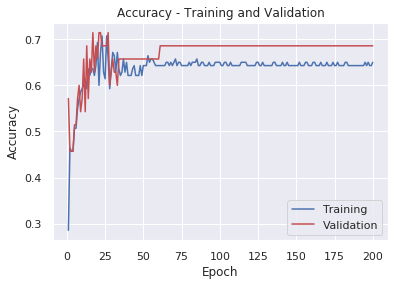

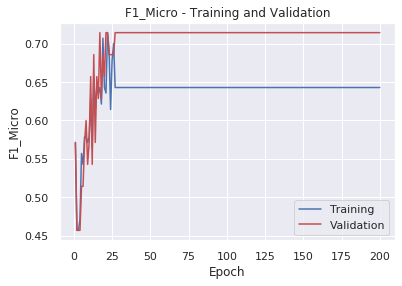

wandb run finished


In [34]:
from constants import BEST_SW_COLS_MIN_VAL_LESS_THAN_30, \
                      LEAD_NO_50_COLS, \
                      COPPER_NO_500_COLS, \
                      CADMIUM_NO_50_COLS

cols_to_use = {
    'Sw': BEST_SW_COLS_MIN_VAL_LESS_THAN_30,
    'Cu': COPPER_NO_500_COLS,
    'Cd': CADMIUM_NO_50_COLS,
    'Pb': LEAD_NO_50_COLS
    }

config = load_default_config()
config.cols_to_use = cols_to_use

num_rounds = 5

for i in range(num_rounds):
    print(f'RUN {i+1}/{num_rounds}')
    history = train(config)